In [ ]:
# # Data Dictionary
# # Variable Name	Description
# # LoanNr_ChkDgt	Identifier Primary key
# # Name	Borrower name
# # City	Borrower city
# # State	Borrower state
# # Zip	Borrower zip code
# # Bank	Bank name
# # BankState	Bank state
# # NAICS	North American industry classification system code
# # ApprovalDate	Date SBA commitment issued
# # ApprovalFY	Fiscal year of commitment
# # Term	Loan term in months
# # NoEmp	Number of business employees
# # NewExist	1 = Existing business, 2 = New business
# # CreateJob	Number of jobs created
# # RetainedJob	Number of jobs retained
# # FranchiseCode	Franchise code, (00000 or 00001) = No franchise
# # UrbanRural	1 = Urban, 2 = rural, 0 = undefined
# # RevLineCr	Revolving line of credit: Y = Yes, N = No
# # LowDoc	LowDoc Loan Program: Y = Yes, N = No
# # ChgOffDate	The date when a loan is declared to be in default
# # DisbursementDate	Disbursement date
# # DisbursementGross	Amount disbursed
# # BalanceGross	Gross amount outstanding
# # MIS_Status	Loan status charged off = CHGOFF, Paid in full =PIF
# # ChgOffPrinGr	Charged-off amount
# # GrAppv	Gross amount of loan approved by bank
# # SBA_Appv	SBA’s guaranteed amount of approved loan


# Description of the first two digits of NAICS.
# Sector	Description
# 11	Agriculture, forestry, fishing and hunting
# 21	Mining, quarrying, and oil and gas extraction
# 22	Utilities
# 23	Construction
# 31–33	Manufacturing
# 42	Wholesale trade
# 44–45	Retail trade
# 48–49	Transportation and warehousing
# 51	Information
# 52	Finance and insurance
# 53	Real estate and rental and leasing
# 54	Professional, scientific, and technical services
# 55	Management of companies and enterprises
# 56	Administrative and support and waste management and remediation services
# 61	Educational services
# 62	Health care and social assistance
# 71	Arts, entertainment, and recreation
# 72	Accommodation and food services
# 81	Other services (except public administration) 92 Public administration

In [ ]:
import requests
import zipfile
import io
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from plotnine import *
from sklearn.preprocessing import LabelEncoder
import plotly.express as px
# URL del dataset en Kaggle
url = "https://www.kaggle.com/api/v1/datasets/download/mirbektoktogaraev/should-this-loan-be-approved-or-denied"

# Descargamos el contenido
response = requests.get(url, allow_redirects=True)
if response.status_code == 200:
    print("Descarga completada ✅")
else:
    print("Error en la descarga:", response.status_code)

# Guardamos el zip en memoria
zip_file = zipfile.ZipFile(io.BytesIO(response.content))

# Listamos los archivos dentro del zip
print("Archivos en el zip:", zip_file.namelist())

# Elegimos el CSV (ajustá el nombre según corresponda)
csv_filename = zip_file.namelist()[0]

# Leemos el CSV directamente desde el zip
df = pd.read_csv(zip_file.open(csv_filename))


pd.set_option('display.max_rows', None)  # Muestra todas las filas
pd.set_option('display.max_columns', None)  # Muestra todas las columnas

# age={'18-29':1,'30-44':2,'45-60':3,
# '> 60':4,
# 'Response':0,
# np.nan:0}

Descarga completada ✅
Archivos en el zip: ['SBAnational.csv', 'Should This Loan be Approved or Denied A Large Dataset with Class Assignment Guidelines.pdf']


C:\Users\alejo\AppData\Local\Temp\ipykernel_21532\1070785858.py:30: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.


In [13]:
df.head(2)

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,28-Feb-97,1997,84,4,2.0,0,0,1,0,N,Y,NaN,28-Feb-99,"$60,000.00",$0.00,P I F,$0.00,"$60,000.00","$48,000.00"
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,28-Feb-97,1997,60,2,2.0,0,0,1,0,N,Y,NaN,31-May-97,"$40,000.00",$0.00,P I F,$0.00,"$40,000.00","$32,000.00"


In [9]:
cash_econde=['GrAppv','SBA_Appv','ChgOffPrinGr','DisbursementGross','BalanceGross']

for col in cash_econde:
    df[col] = df[col].astype(str).str.replace(r'[\$,]', '', regex=True).astype(float)



In [21]:
df.head(5)

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,28-Feb-97,1997,84,4,2.0,0,0,1,0,N,Y,NaN,28-Feb-99,60000.0,0.0,P I F,0.0,60000.0,48000.0
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,28-Feb-97,1997,60,2,2.0,0,0,1,0,N,Y,NaN,31-May-97,40000.0,0.0,P I F,0.0,40000.0,32000.0
2,1000034009,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,47401,GRANT COUNTY STATE BANK,IN,621210,28-Feb-97,1997,180,7,1.0,0,0,1,0,N,N,NaN,31-Dec-97,287000.0,0.0,P I F,0.0,287000.0,215250.0
3,1000044001,"BIG BUCKS PAWN & JEWELRY, LLC",BROKEN ARROW,OK,74012,1ST NATL BK & TR CO OF BROKEN,OK,0,28-Feb-97,1997,60,2,1.0,0,0,1,0,N,Y,NaN,30-Jun-97,35000.0,0.0,P I F,0.0,35000.0,28000.0
4,1000054004,"ANASTASIA CONFECTIONS, INC.",ORLANDO,FL,32801,FLORIDA BUS. DEVEL CORP,FL,0,28-Feb-97,1997,240,14,1.0,7,7,1,0,N,N,NaN,14-May-97,229000.0,0.0,P I F,0.0,229000.0,229000.0


In [23]:
df['NAICS'] = df['NAICS'].astype(str).apply(lambda x: x[:2])
df['NAICS'].head(5)


0    45
1    72
2    62
3     0
4     0
Name: NAICS, dtype: object

In [25]:
naics_dict = {
    '11': 'Agriculture, forestry, fishing and hunting',
    '21': 'Mining, quarrying, and oil and gas extraction',
    '22': 'Utilities',
    '23': 'Construction',
    '31': 'Manufacturing',
    '32': 'Manufacturing',
    '33': 'Manufacturing',
    '42': 'Wholesale trade',
    '44': 'Retail trade',
    '45': 'Retail trade',
    '48': 'Transportation and warehousing',
    '49': 'Transportation and warehousing',
    '51': 'Information',
    '52': 'Finance and insurance',
    '53': 'Real estate and rental and leasing',
    '54': 'Professional, scientific, and technical services',
    '55': 'Management of companies and enterprises',
    '56': 'Administrative and support and waste management and remediation services',
    '61': 'Educational services',
    '62': 'Health care and social assistance',
    '71': 'Arts, entertainment, and recreation',
    '72': 'Accommodation and food services',
    '81': 'Other services (except public administration)',
    '92': 'Public administration'
}


In [26]:
df['Industry'] = df['NAICS'].map(naics_dict)
df[['NAICS','Industry']].head()


,NAICS,Industry
0,45,Retail trade
1,72,Accommodation and food services
2,62,Health care and social assistance
3,0,NaN
4,0,NaN


In [20]:



df_grouped = df.groupby("State")[['ChgOffPrinGr']].mean().reset_index()

# Ahora sí podés graficar con choropleth
fig = px.choropleth(
    df_grouped,
    locations="State",        # columna con nombres de estados
    locationmode="USA-states",# para estados de USA
    color='ChgOffPrinGr',    # la primera columna numérica que quieras mapear
    scope="usa",
    color_continuous_scale="Turbo"
)

fig.update_layout(
    title_text="In which state people are less likely to pay off a loan?",
    title_x=0.5,
    coloraxis_colorbar=dict(
        title="Debt in K"
    )
)
fig.show()


In [12]:
# columnas de fechas a transformar
dates_encode = ['DisbursementDate', 'ApprovalDate']

# convertir a datetime
for col in dates_encode:
    df[col] = pd.to_datetime(df[col], format='%d-%b-%y', errors='coerce')
    
    df[col + '_day'] = df[col].dt.day.fillna(0).astype('int32')
    df[col + '_month'] = df[col].dt.month.fillna(0).astype('int32')
    df[col + '_year'] = df[col].dt.year.fillna(0).astype('int32')
    df[col + '_weekday'] = df[col].dt.weekday.fillna(0).astype('int32')
    df[col + '_quarter'] = df[col].dt.quarter.fillna(0).astype('int32')



In [13]:
df = df.drop(columns=dates_encode)


In [6]:
df.isnull().sum()

LoanNr_ChkDgt                    0
Name                            14
City                            30
State                           14
Zip                              0
Bank                          1559
BankState                     1566
NAICS                            0
ApprovalFY                       0
Term                             0
NoEmp                            0
NewExist                       136
CreateJob                        0
RetainedJob                      0
FranchiseCode                    0
UrbanRural                       0
RevLineCr                     4528
LowDoc                        2582
ChgOffDate                  736465
DisbursementGross                0
BalanceGross                     0
MIS_Status                    1997
ChgOffPrinGr                     0
GrAppv                           0
SBA_Appv                         0
DisbursementDate_day             0
DisbursementDate_month           0
DisbursementDate_year            0
DisbursementDate_wee

In [10]:
df[df['BankState'].isnull()].head(10)


,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,ChgOffDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv,DisbursementDate_day,DisbursementDate_month,DisbursementDate_year,DisbursementDate_weekday,DisbursementDate_quarter,ApprovalDate_day,ApprovalDate_month,ApprovalDate_year,ApprovalDate_weekday,ApprovalDate_quarter
407,1003113008,MOUNTVILLE WALL PAPER CO,MOUNTVILLE,PA,17554,NaN,NaN,0,1980,120,57,2.0,0,0,0,0,N,N,4-Jun-90,600000.0,0.0,CHGOFF,320976.0,600000.0,499998.0,25,7,1980,4,3,27,6,1980,4,2
611,1004503009,SMITHFIELD GLASS INC,DANIELSON,CT,6239,NaN,NaN,0,1980,180,30,2.0,0,0,0,0,N,N,22-May-90,0.0,0.0,NaN,144461.0,300000.0,300000.0,0,0,0,0,0,7,7,1980,0,3
680,1004933009,TAYLOR BROTHERS COMPANY,CLEVELAND,OH,44114,NaN,NaN,0,1980,120,18,2.0,0,0,0,0,N,N,8-Feb-89,275000.0,0.0,CHGOFF,181916.0,275000.0,247500.0,21,8,1980,3,3,8,7,1980,1,3
740,1005273003,"GENERAL SOLAR COMPANY, INC.",SIOUX CITY,IA,51111,NaN,NaN,0,1980,120,3,1.0,0,0,0,0,N,N,8-Feb-90,0.0,0.0,NaN,142666.0,350000.0,350000.0,0,0,0,0,0,3,7,1980,3,3
6569,1044653002,SON'S PARTY STORE,KENTWOOD,MI,49508,NaN,NaN,0,1980,180,1,2.0,0,0,0,0,N,N,27-Oct-93,0.0,0.0,NaN,18775.0,20000.0,20000.0,0,0,0,0,0,11,9,1980,3,3
9602,1066623005,"ENERGY WORKS, LTD",ENGLEWOOD,CO,80110,NaN,NaN,0,1981,120,5,1.0,0,0,0,0,N,N,1-May-89,0.0,0.0,NaN,133365.0,150000.0,150000.0,0,0,0,0,0,8,10,1980,2,4
10412,1073273005,CUT N STYLE BY MARIETTA,"IMPERIAL,",NE,69033,NaN,NaN,0,1981,120,3,2.0,0,0,0,0,N,N,1-Feb-89,0.0,0.0,NaN,6642.0,10800.0,10800.0,0,0,0,0,0,10,10,1980,4,4
11824,1084503008,WANDA BREWER,JEFFERSONVILLE,IN,47130,NaN,NaN,0,1981,150,1,2.0,0,0,0,0,N,N,14-Sep-92,0.0,0.0,NaN,568.0,10000.0,10000.0,0,0,0,0,0,30,10,1980,3,4
13507,1096603000,TINY TREASURES % TOLENO,LONG VALLEY,NJ,7853,NaN,NaN,0,1981,144,1,1.0,0,0,0,0,N,N,20-Nov-91,0.0,0.0,NaN,7380.0,16000.0,16000.0,0,0,0,0,0,10,11,1980,0,4
15254,1110613000,SATELLITE HAIR CENTER,HOUSTON,TX,77018,NaN,NaN,0,1981,84,4,1.0,0,0,0,0,N,N,11-Apr-91,0.0,0.0,NaN,7722.0,20000.0,20000.0,0,0,0,0,0,1,12,1980,0,4


In [14]:


def encode_categorical_columns(df):
    """
    Label encoding para columnas no numéricas o mixtas.
    Reemplaza nulos por "0" antes del encoding y elimina las columnas originales.
    """
    df_encoded = df.copy()
    categorical_cols = df.select_dtypes(exclude=['int64', 'float64']).columns

    for col in categorical_cols:
        le = LabelEncoder()
        # Reemplazamos nulos por "0" y convertimos todo a string
        df_encoded[col + '_token'] = le.fit_transform(
            df_encoded[col].fillna('0').astype(str)
        )
    
    # Eliminamos las columnas originales
    df_encoded = df_encoded.drop(columns=categorical_cols)

    return df_encoded


In [15]:
df_tokenized = encode_categorical_columns(df)


In [16]:
df_tokenized.head(5)

,LoanNr_ChkDgt,Zip,NAICS,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,DisbursementGross,BalanceGross,ChgOffPrinGr,GrAppv,SBA_Appv,Name_token,City_token,State_token,Bank_token,BankState_token,ApprovalFY_token,RevLineCr_token,LowDoc_token,ChgOffDate_token,MIS_Status_token,DisbursementDate_day_token,DisbursementDate_month_token,DisbursementDate_year_token,DisbursementDate_weekday_token,DisbursementDate_quarter_token,ApprovalDate_day_token,ApprovalDate_month_token,ApprovalDate_year_token,ApprovalDate_weekday_token,ApprovalDate_quarter_token
0,1000014003,47711,451120,84,4,2.0,0,0,1,0,60000.0,0.0,0.0,60000.0,48000.0,12792,8559,16,2144,39,34,12,7,0,2,21,5,31,6,1,20,4,28,4,0
1,1000024006,46526,722410,60,2,2.0,0,0,1,0,40000.0,0.0,0.0,40000.0,32000.0,405594,19589,16,133,19,34,12,7,0,2,25,8,29,5,2,20,4,28,4,0
2,1000034009,47401,621210,180,7,1.0,0,0,1,0,287000.0,0.0,0.0,287000.0,215250.0,759977,2207,16,2860,19,34,12,4,0,2,25,4,29,2,4,20,4,28,4,0
3,1000044001,74012,0,60,2,1.0,0,0,1,0,35000.0,0.0,0.0,35000.0,28000.0,83889,2721,37,26,40,34,12,7,0,2,24,9,29,0,2,20,4,28,4,0
4,1000054004,32801,0,240,14,1.0,7,7,1,0,229000.0,0.0,0.0,229000.0,229000.0,38544,21135,10,2684,12,34,12,4,0,2,6,8,29,2,2,20,4,28,4,0


In [18]:
df_tokenized.isnull().sum()


LoanNr_ChkDgt                       0
Zip                                 0
NAICS                               0
Term                                0
NoEmp                               0
NewExist                          136
CreateJob                           0
RetainedJob                         0
FranchiseCode                       0
UrbanRural                          0
DisbursementGross                   0
BalanceGross                        0
ChgOffPrinGr                        0
GrAppv                              0
SBA_Appv                            0
Name_token                          0
City_token                          0
State_token                         0
Bank_token                          0
BankState_token                     0
ApprovalFY_token                    0
RevLineCr_token                     0
LowDoc_token                        0
ChgOffDate_token                    0
MIS_Status_token                    0
DisbursementDate_day_token          0
Disbursement

In [ ]:
df_tokenized['NewExist'].isnull()

In [26]:
correlation_matrix = df.corr(numeric_only=True)

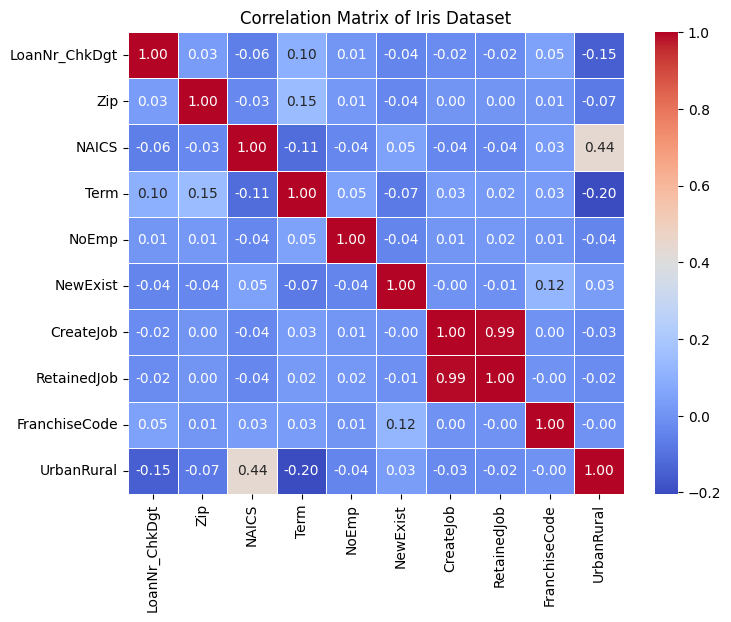

In [27]:
plt.figure(figsize=(8, 6)) # Adjust figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Iris Dataset')
plt.show()